In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
def display(im_path):
    dpi=80
    im_data= plt.imread(im_path)
    if len(im_data.shape) == 2:
        height, width = im_data.shape    
    else:
        height, width, depth = im_data.shape
    
    #what size does the figure need to be in inches to fit the image
    figsize= width / float(dpi), height / float(dpi)
    
    #create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    
    #hide spines, ticks, etc.
    ax.axis('off')
    
    #display the image
    ax.imshow(im_data, cmap='gray')
    
    plt.show()

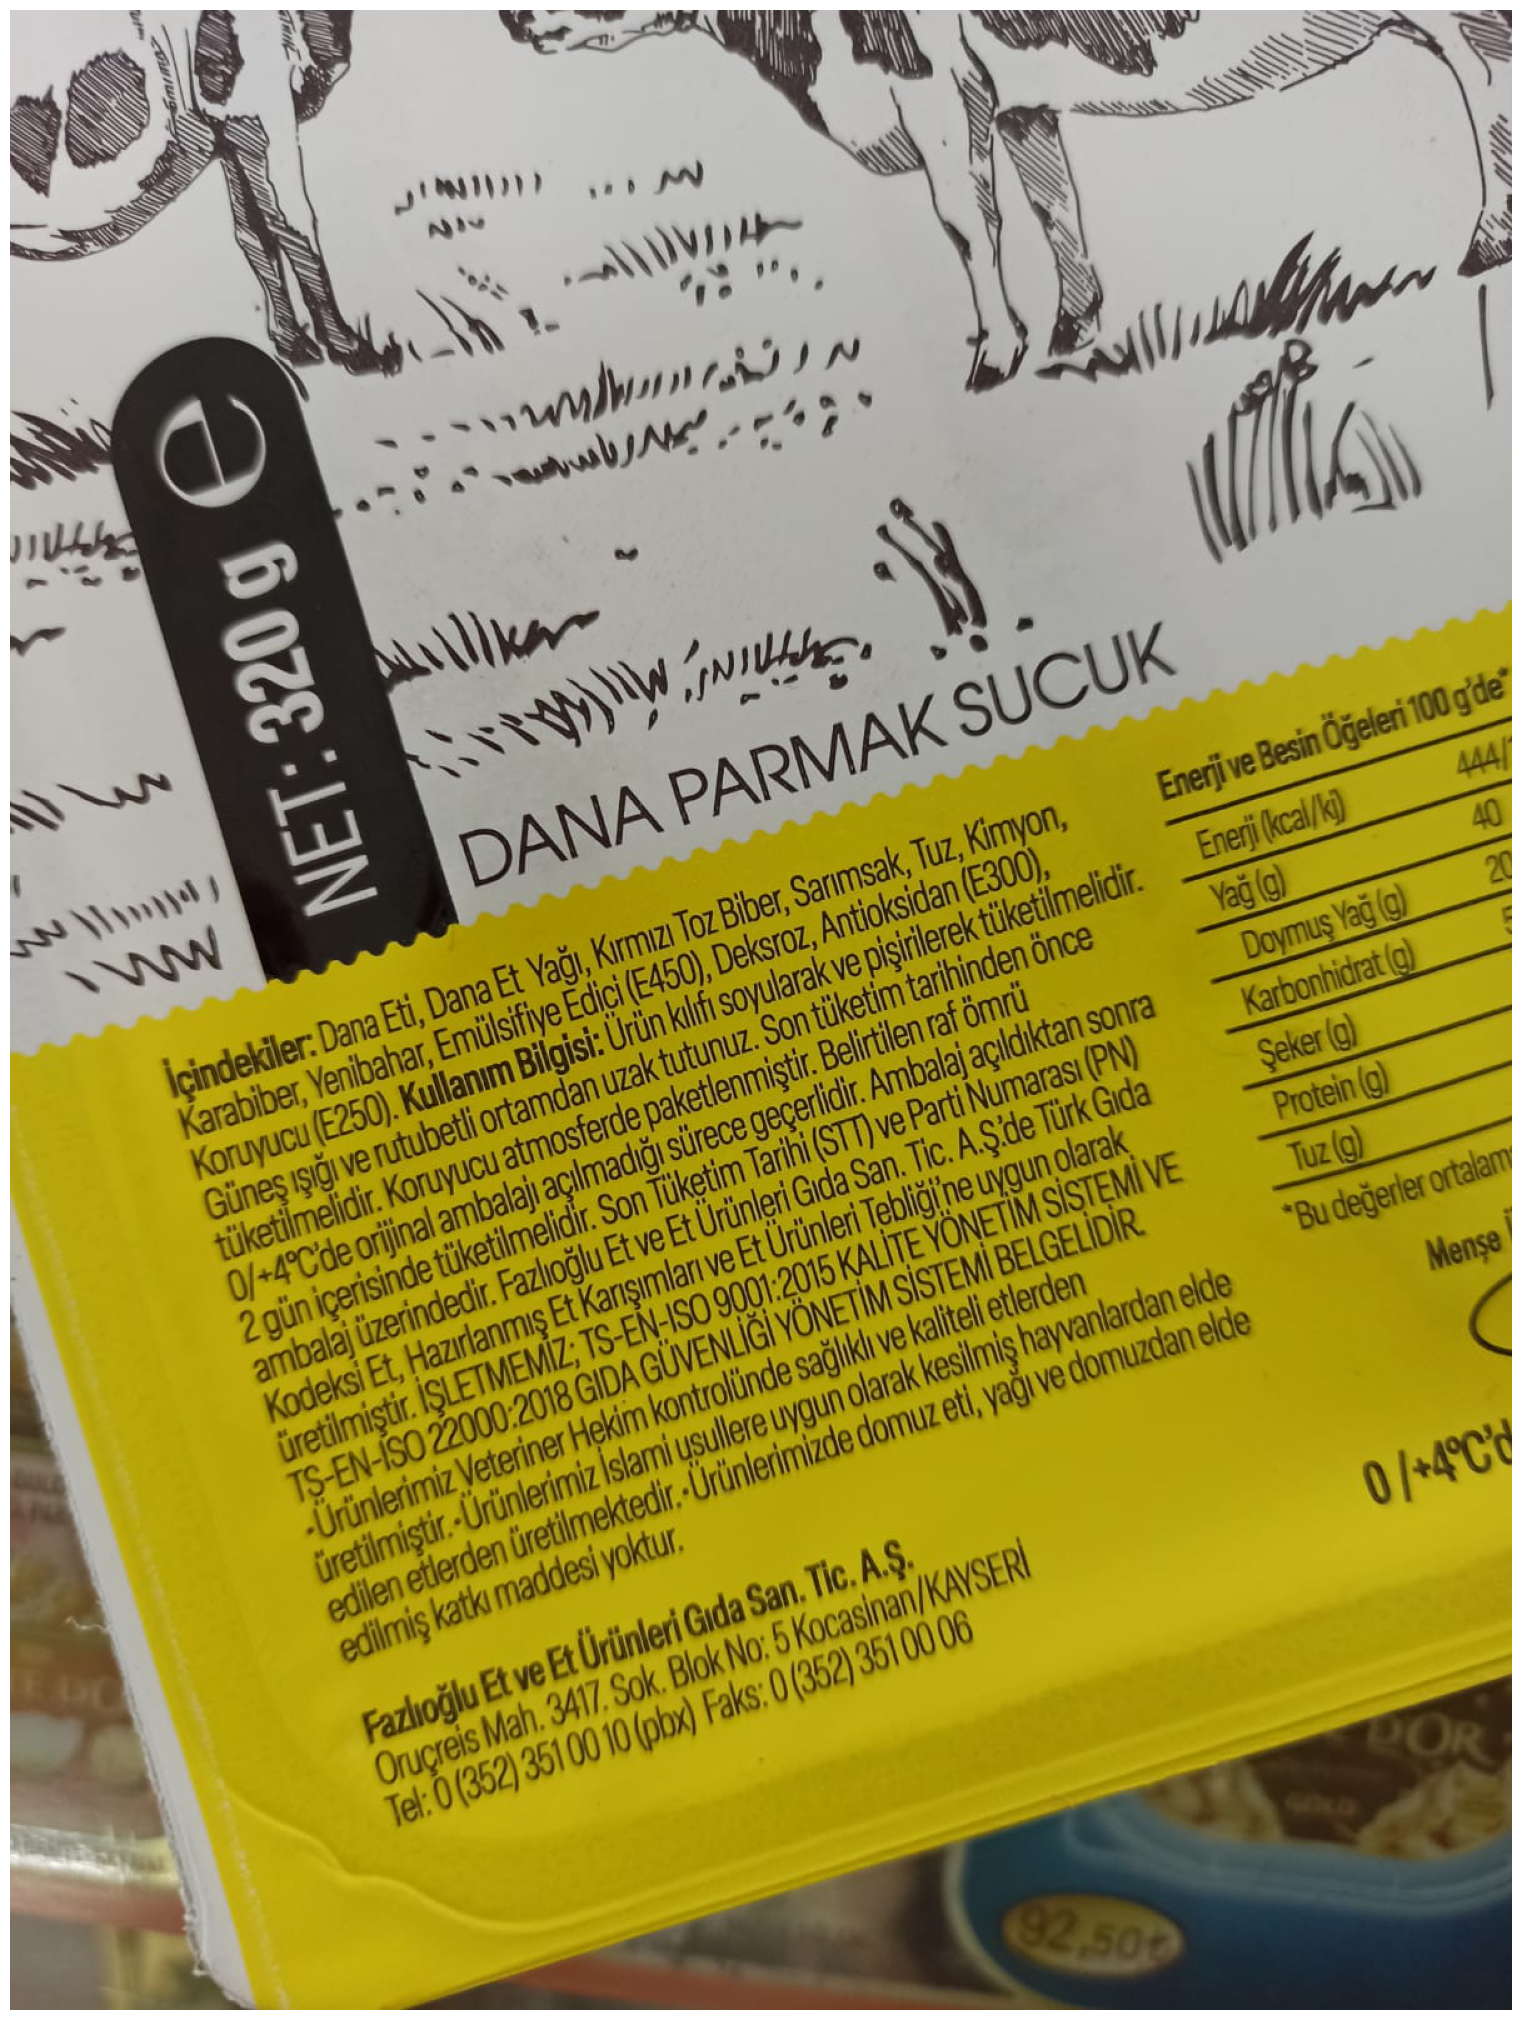

In [ ]:
new = cv2.imread("C:/Users\ENES/Desktop/yamuk fotolar/WhatsApp Image 2023-11-11 at 22.01.35.jpeg")
display("C:/Users/ENES/Desktop/yamuk fotolar/WhatsApp Image 2023-11-11 at 22.01.35.jpeg")

In [ ]:
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("C:/Users/ENES/Desktop/yamuk fotolar/boxed.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    print(angle)
    if angle < -45:
        angle = 90 + angle
    elif angle > 45:
        angle = 270 + angle
    return -1.0 * angle

In [ ]:
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [ ]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [ ]:
fixed = deskew(new)
cv2.imwrite("C:/Users/ENES/Desktop/yamuk fotolar/rotated_fixed.jpg", fixed)

35
73.4078598022461


True

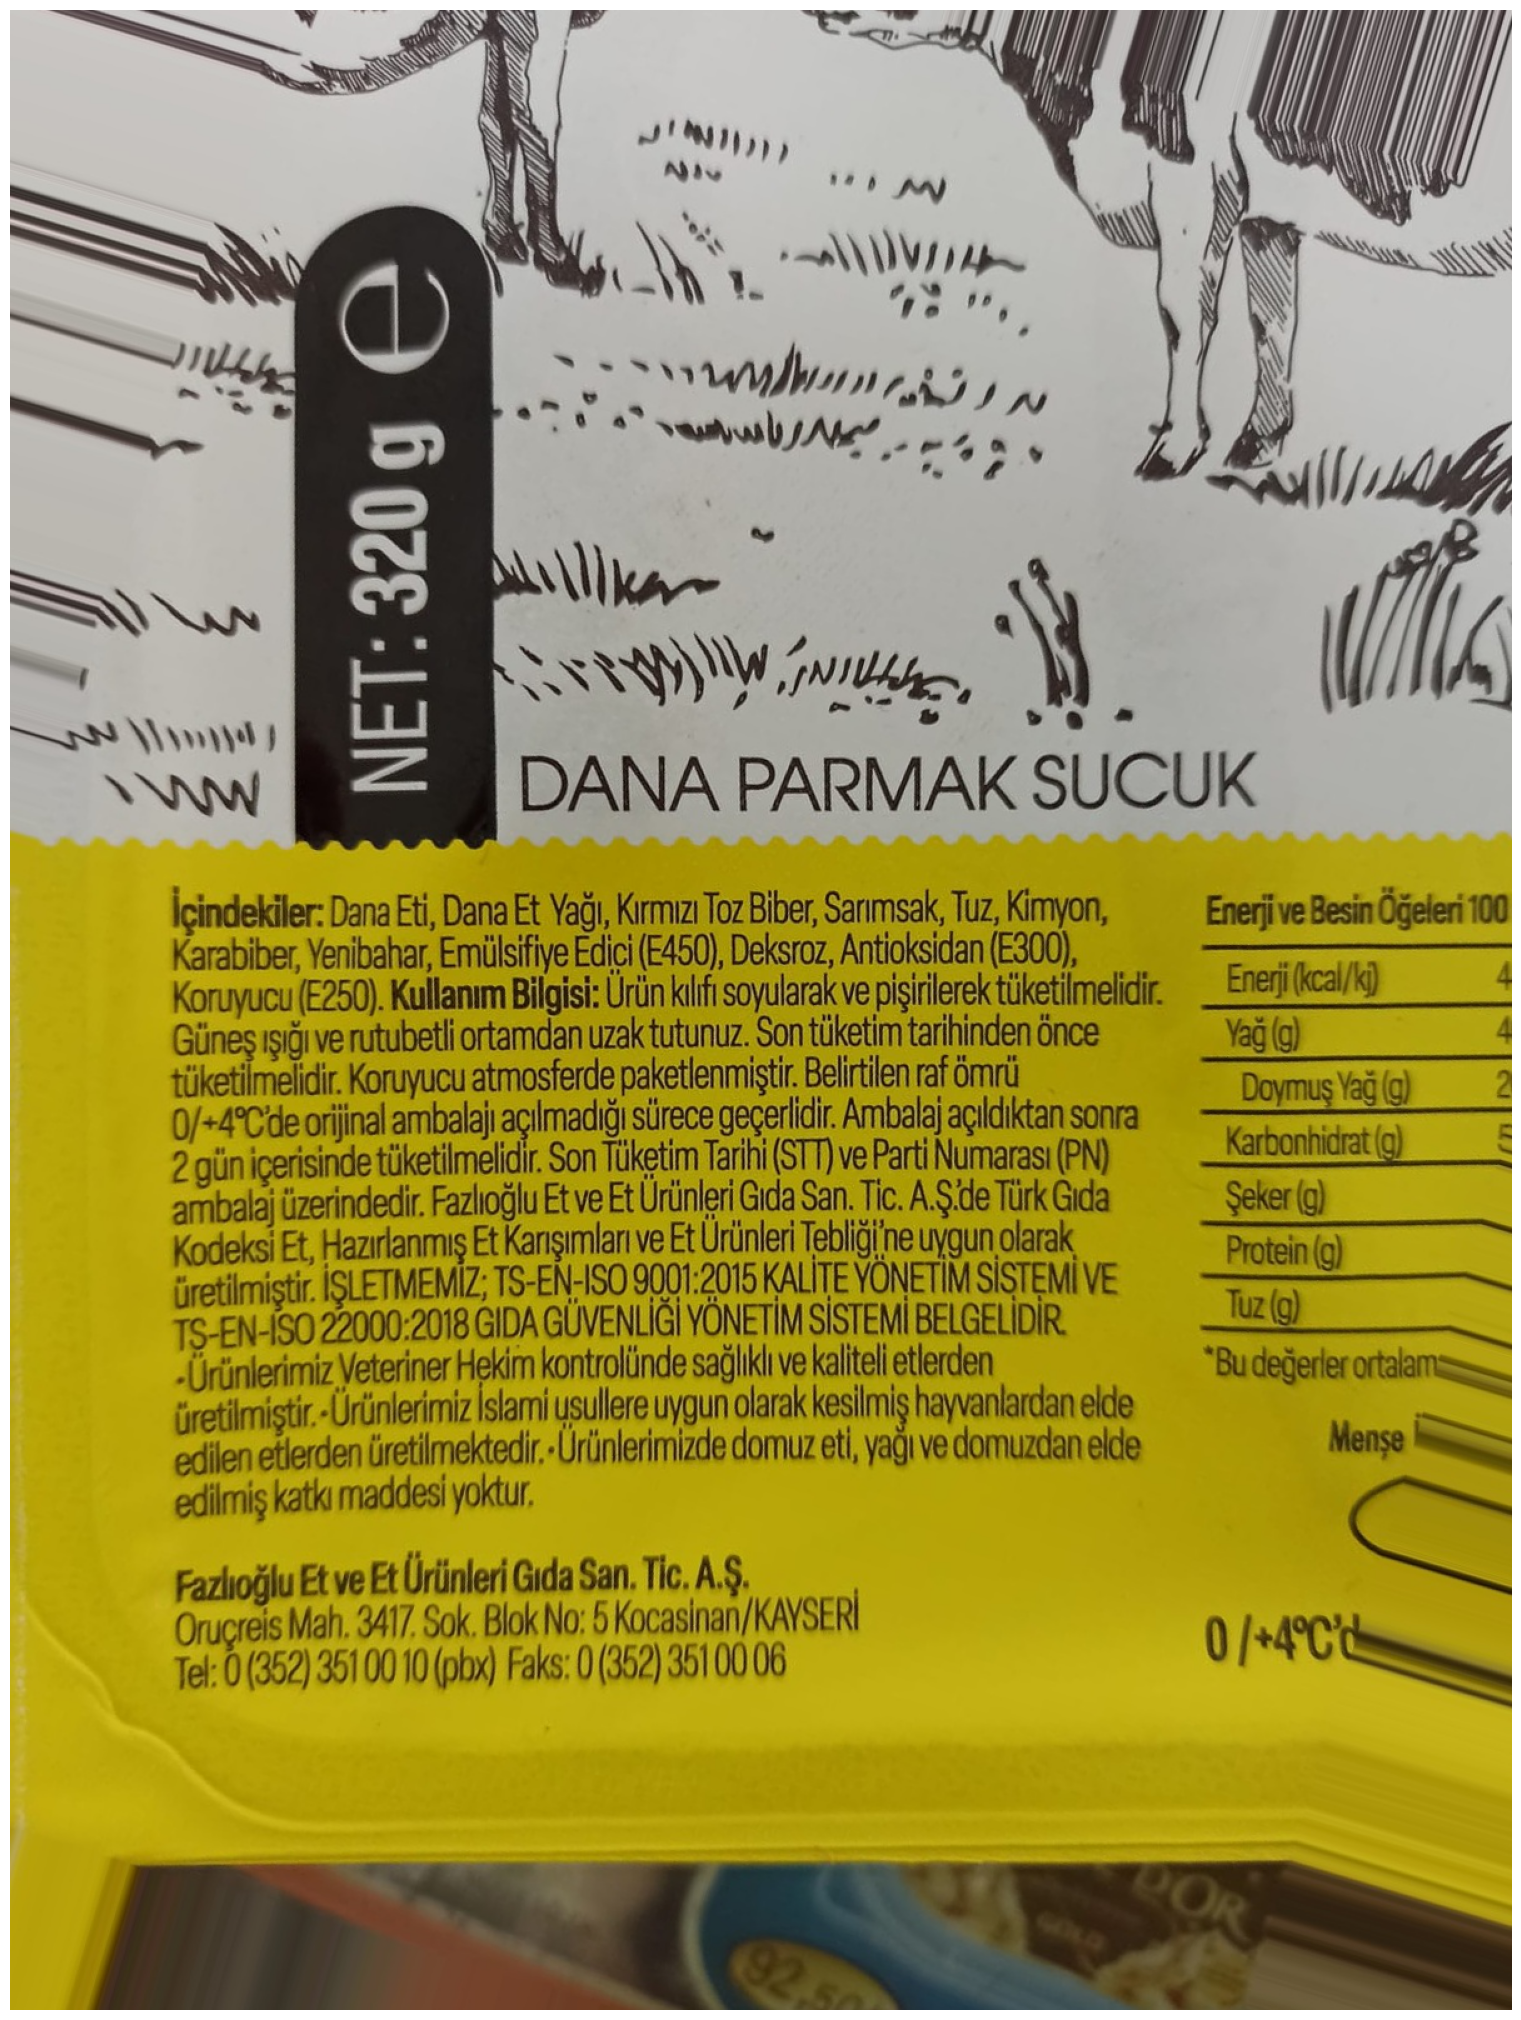

In [ ]:
new = cv2.imread("C:/Users/ENES/Desktop/yamuk fotolar/rotated_fixed.jpg")
display("C:/Users/ENES/Desktop/yamuk fotolar/rotated_fixed.jpg")